# 机器学习笔记：常用数据集(基于scikit-learn的处理)



# 1. 前言

机器学习算法是以数据为粮食的，所以机器学习开发的第一步就是数据的准备。数据预处理和特征工程是机器学习中不显眼（没有像算法开发那样亮丽）但是往往是涉及工作量最大的一部分。

对机器学习算法的学习和开发人员的一个福音是互联网上有很多开源的数据集，scikit-learn也内置了一部分简单的规模较小的数据（随安装包），并且为其它规模较大的数据集准备了相应的获取（下载）的API。这些数据集已经经过了适当的预处理，可以使得机器学习算法的学习和开发人员可以回避掉数据采集和处理的“吃力不讨好”的过程而聚焦于机器学习算法本身。

此外，scikit-learn还有自动生成面向各种机器学习问题的随机数据集的工具。这些随机生成的数据集（通常戏称为toy datasets）虽然不是来源于实际测量，但是由于可以很简单地生成，而且其统计特征是受控的，所以对于机器学习的学习者或者机器学习算法的早期开发验证也是非常有用。

本文简要介绍这几种数据集的生成、加载和/或获取方式，以及相应的基于scikit-learn的处理方法。

# 2. Scikit-learn内置数据集

Scikit-learn中内置了一些非常经典的小规模的数据集（称为toy datasets, 玩具数据集），这些数据集可以用sklearn.dataset模块中load_xyz系列函数进行加载(其中'xyz'表示数据集的名称)。

详细参见： https://scikit-learn.org/stable/datasets/toy_dataset.html

In [149]:
import pandas as pd

dataset = pd.DataFrame()

dataset['数据集名称'] = ['波士顿房价数据集','鸢尾花数据集','手写数字数据集','糖尿病数据集','葡萄酒数据集','乳腺癌数据集','体能训练数据集']
dataset['加载方法'] = ['load_boston','load_iris','load_digits','load_diabetes','load_wine','load_breast_cancer','load_linnerud']
dataset['模型类型'] = ['regression','classification','classification','regression','classification','classification','multiple regression']
dataset['数据大小(样本数*特征数)'] = ['506*13','150*4','1797*64','442*10','178*13','569*30','20*3']
dataset


,数据集名称,加载方法,模型类型,数据大小(样本数*特征数)
0,波士顿房价数据集,load_boston,regression,506*13
1,鸢尾花数据集,load_iris,classification,150*4
2,手写数字数据集,load_digits,classification,1797*64
3,糖尿病数据集,load_diabetes,regression,442*10
4,葡萄酒数据集,load_wine,classification,178*13
5,乳腺癌数据集,load_breast_cancer,classification,569*30
6,体能训练数据集,load_linnerud,multiple regression,20*3


## 例1：鸢尾花数据集

In [150]:
from sklearn.datasets import load_iris, load_digits, load_diabetes
from sklearn.datasets import get_data_home
iris = sklearn.datasets.load_iris()
print(type(iris))
#print(iris.DESCR)
print(list(iris))
print(iris['data'].shape, iris['target'].shape)
print(iris['frame'])
print(iris['feature_names'])
print(iris['filename'])
print(iris['data_module'])

<class 'sklearn.utils.Bunch'>
['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
(150, 4) (150,)
None
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris.csv
sklearn.datasets.data


如以上例子所示，sklearn通过load_xyz()加载的数据集以Bunch的格式返回，与Python中的dict很像，里面包含键值对(key-value pair)。

首先我们可以通过list()调用观察所加载的数据集有哪些键。

需要注意的是，并不是每个数据集都具有完全相同的键集。比如说以下iris数据集有8个键值，而波斯顿房价数据集则只有6个。但是'data','target','DESCR'大家都有，而且可能最常用的可能就是这3个。'DESCR'包含了该数据集的描述性信息。'data','target'则顾名思义分别是指数据样本及对应的标签。

考虑到可能Pandas DataFrame可能更加为人熟知，也可以把Bunch数据转换为Pandas Dataframe然后再做进一步的处理。如下所示，DataFrame的显示更养眼一些。

In [148]:
diabetes = sklearn.datasets.load_diabetes()
#print(df.DESCR)
print(list(diabetes))
print(diabetes['data'].shape, diabetes['target'].shape)
# 转化为df
df = pd.DataFrame.from_records(data=diabetes.data, columns=data.feature_names)
df

['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module']
(442, 10) (442,)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


手写数字数据集由于其原始数据其实是二维图像，所以其中还有'images'这一项，对应了数据样本的二维表示，可以用imshow()作为图像显示出来。

['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']


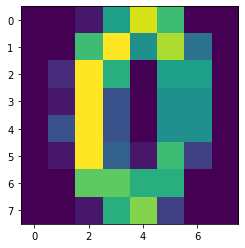

In [88]:
from matplotlib.pyplot import imshow
df = sklearn.datasets.load_digits()
#print(df.DESCR)
print(list(df))
imshow(df['images'][10])

如上图可以看出，‘手写数字数据集’中的数字只有$8*8$的大小（比之MNIST的$28*28$要小得多），所以人眼看上去很难辨认，但是机器算法能够做到！

# 3. Scikit-learn分类和聚类数据集生成

scikit-learn提供了随机生成数据集的API，可以很方便地生成指定机器学习算法类型所需要的数据集。这一系列的函数统一以make_打头。

以下各节分别介绍分类和聚类数据集生成的接口函数，其中有六个是用于单标签类数据生成：
(1) make_blobs()

(2) make_classification()

(3) make_gaussian_quantiles()

(4) make_hastie_10_2()

(5) make_circles()

(6) make_moons()

一个用于多标签类数据生成:

(7) make_multilabel_classification()

还有两个用于双聚类数据集生成：

(8) make_biclusters

(9) make_checkerboard

以下分别给出一些示例代码，但是不对各用到的函数的参数进行具体描述，仅在以下例子中对用到的参数顺带说明。scikit-learn提供了丰富的参数用于所生成的数据集的特性控制，需要进一步的详细信息请参考scikit-learn在线文档）：需要使用时可以自行查阅scikit-learn文档。


## 3.1 make_classification

make_blobs()和make_classification()都用于生成多类别的数据集，每个类别都是由一个或者多个正态分布簇(normally-distributed cluster)构成。

make_blobs对于各簇的中心和标准偏差提供了更方便的控制选项，通常用于聚类算法的演示。

而make_classification则更加侧重于通过各种手段导入各种“噪声”的影响，比如说，相关的、冗余的、没有信息量的特征；每个类分成多个正态分布簇；特征空间的线性变换等等。


(1000, 5) (1000,)


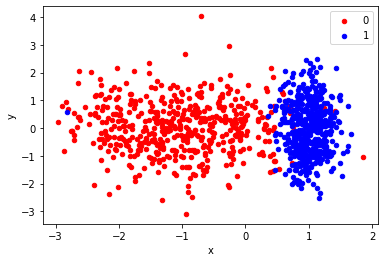

In [21]:
# Example1: make_classification()生成二分类数据集
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000, n_features=5,n_redundant=0,n_clusters_per_class=1,n_informative=1, n_classes=2, random_state=20)

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

print(X.shape, y.shape)

## 3.2 make_blobs

'blob'的意思可能跟cluster差不多，都是簇、团、块的意思。

以下第一个例子生成了3个blobs，第二个例子生成了4个blobs。注意，在第3个例子中，显式地制指定了4个blobs的中心各簇的样本数，以及各簇的standard deviation.

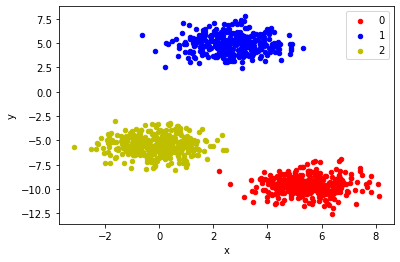

In [16]:
# make_blobs: Generate isotropic Gaussian blobs for clustering. Of course, can also be used for classfication problem.
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,random_state=10)

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue',2:'y'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

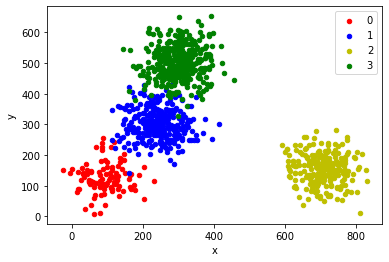

In [28]:
X, y = make_blobs(n_samples=[100,300,250,400], n_features=2,
                  centers=[[100,120],[250,300], [700,150],[300,500]],
                  cluster_std=50, random_state=111)

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue',2:'y', 3: 'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

## 3.3 make_moons
make_moons()函数生成一个二分类问题数据集，它生成两个半月形对应两个分类。可以通过noise参数来控制噪声量。
适合于非线性分类算法的演示。

This test problem is suitable for algorithms that are capable of learning nonlinear class boundaries.

The example below generates a moon dataset with moderate noise.

Running the example generates and plots the dataset for review, again coloring samples by their assigned class.

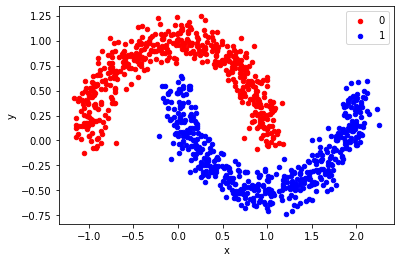

In [19]:
# make_moons: Generate isotropic Gaussian blobs for clustering.
# 经常用于非线性分类示例。
from sklearn.datasets import make_moons
# generate 2d classification dataset
X, y = make_moons(n_samples=1000,shuffle=True, noise=0.1, random_state=10)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

## 3.4 make_circles

顾名思义，每个类别的样本构成一个圆形。

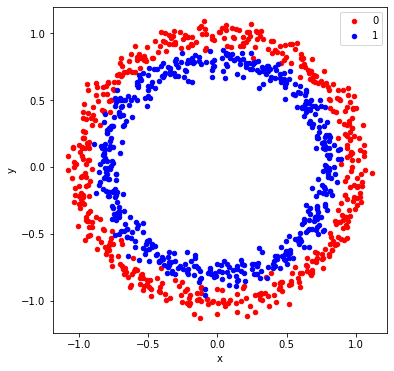

In [20]:
# make_circles: generates a binary classification problem with datasets that fall into concentric circles.
# Make a large circle containing a smaller circle in 2d. 
# A simple toy dataset to visualize clustering and classification algorithms, suitable for algorithms that can learn complex non-linear manifolds.

from sklearn.datasets import make_circles
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.05) # 'noise' is used to control the amount of noise in the shapes.
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=[6,6])
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])


## 3.5 make_gaussian_quantiles

make_gaussian_quantiles()首先生成一个多维正态分布样本集，然后，将这样本集基于分位点(quantiles)分割成多个(n_classes=3 by default)嵌套的多维同心超球，每个超球属于一类，并使得大致各类的样本基本相等。

基于分位点进行分割是什么意思呢？

以一维正态分布为例，大致来说就是这样分割的。假设n_classes = 3，因此对应的两个分割用的分位点就是33%和66%。取样本中位于[0, 33%]分位区间的作为第一类，位于[33%, 66%]分位区间的作为第二类，位于[66%, 100%]分位区间的作为第三类。对于多维数据，是基于对应的$\chi^2$分布的分位数来进行分类。

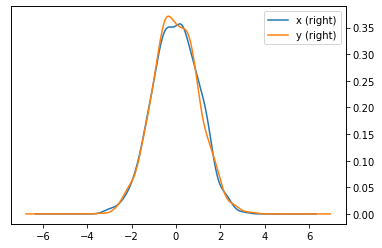

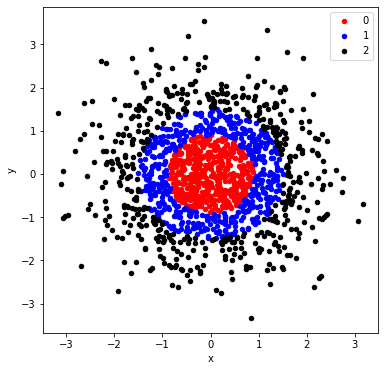

In [52]:
from sklearn.datasets import make_gaussian_quantiles
import numpy as np
import pandas as pd

data, target = make_gaussian_quantiles(n_samples=1500, cov=1.0, n_classes=3)

df = pd.DataFrame(data)
df['target'] = target

df[0].plot(kind='kde',secondary_y=True,label='x')
df[1].plot(kind='kde',secondary_y=True,label='y')
plt.legend()

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=data[:,0], y=data[:,1], label=target))
colors = {0:'red', 1:'blue', 2:'k'}
fig, ax = plt.subplots(figsize=[6,6])
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])


In [47]:
df

,x,y,label
0,1.535044,-1.202717,2
1,-0.440405,-2.495207,2
2,-0.537150,-0.044939,0
3,1.322381,0.011662,1
4,-0.666629,1.762562,2
...,...,...,...
1495,-0.108307,0.771311,0
1496,-0.967460,-0.457664,1
1497,-0.392338,1.327309,1
1498,0.674703,0.464662,0


## 3.6 make_hastie_10_2

这个函数是专门用于以下Hastie的机器学习经典教材中例10.2所提及的数据集的生成，用于二分类问题。为一本书中的一个例子专门列了一个函数，确实是很拼。可以看作是make_gaussian_quantiles的一种特例，或者反过来说make_gaussian_quantiles是make_hastie_10_2的推广。

T. Hastie, R. Tibshirani and J. Friedman, “Elements of Statistical Learning Ed. 2”, Springer, 2009.》

该数据集有10个特征，是i.i.d（独立同分布）的标准正态分布，target y定义如下：
    y[i] = 1 if np.sum(X[i] ** 2) > 9.34 else -1
    
    

In [70]:
from sklearn.datasets import make_hastie_10_2
import numpy as np
import pandas as pd

data, target = make_hastie_10_2(n_samples=1000, random_state=42)

#target[target==-1] = 0  # 原数据集生成的target为[1,-1],这里变换为[1,0]
#target = target.astype('int32') # 变换成整数

df = pd.DataFrame(data)
df['target'] = target
     
df    

,0,1,2,3,4,5,6,7,8,9,target
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,-1.0
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,1.0
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,-1.0
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,1.0
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
995,0.867805,0.227405,-0.889845,-0.960780,0.254128,0.697051,0.391881,-1.034598,0.650668,0.425911,-1.0
996,-1.070666,-0.784321,0.688496,-0.234508,1.589147,0.501129,-0.486631,-0.010206,0.063383,-0.728390,-1.0
997,-0.912588,0.701390,0.845273,0.603781,1.515318,-0.541773,1.674271,-0.900921,-1.012686,-1.759959,1.0
998,-0.445795,-0.503722,0.525937,0.243891,-1.192973,-0.392726,-0.371462,-1.775982,-0.980947,-0.770814,-1.0


这是一个10维的数据，所以不容易以散点图的形式进行图示化。以下通过图示的方式看看各个维度是不是独立同分布（i.i.d）的标准高斯分布。

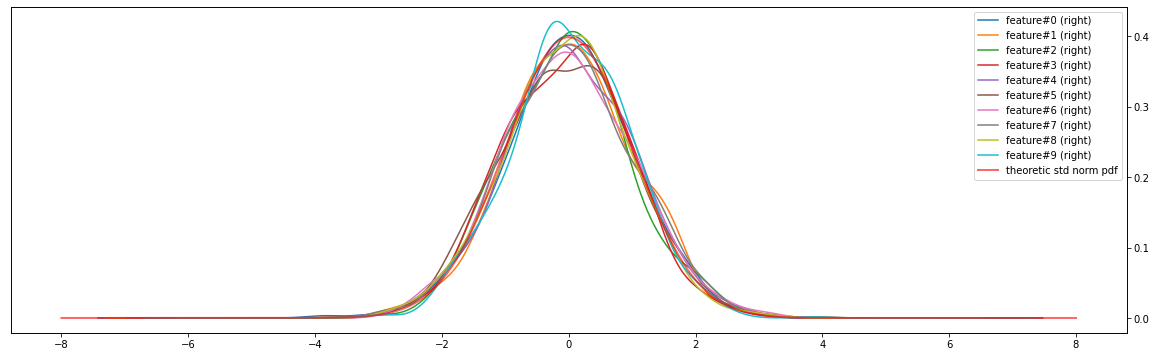

In [85]:
from scipy.stats import norm
plt.figure(figsize=(20,6))
for k in range(10):
    df[k].plot(kind='kde',secondary_y=True,label='feature#'+str(k))
    
x = np.linspace(-8,8, 1000)
plt.plot(x, norm.pdf(x),'r-', lw=2, alpha=0.6, label='theoretic std norm pdf')

plt.legend()

# 3.7 多标签数据集生成

多标签数据集用于当存在多各类别，而待分类的数据可能属于其中的一类或者同时属于多个类别，或者甚至不属于任何类别。比如说，当需要识别在一张图像中所包含的交通信号等的类型。一张图片可能不包含信号灯，也可能只包含一个红灯或绿灯或黄灯，也可能同时包含一个红灯和绿灯（如果这张图片覆盖了一个十字路口的两个方向的信号灯的话）。Ref: https://www.geeksforgeeks.org/an-introduction-to-multilabel-classification/


以下来自于scikit-learn的文档说明
make_multilabel_classification生成多标签的随机样本，反映了从多个混合主题中抽取的单词的分布。每份文档中的主题的个数遵循泊松分布，而主题本身则是从一个固定的随机分布中抽取。同样，单词的个数服从泊松分布，单词本身则从多项分布(multinomial distribution)中抽样。每个主题都定义了一个单词的概率分布。本数据集可以看作是对真正的词袋模型(bag-of-words model)的一种简化, 简化包括以下几项：

(1) 每个主题的单词分布是独立抽样的。而现实世界中，它们(各主题下的单词分布)都受共同的稀疏基分布(sparse base distribution)的影响，而且相互之间是相关的

(2) 对于从多个主题生成的文档，各主题的词袋(bag-of-words)生成是均等权重的

(3) Documents without labels words at random, rather than from a base distribution.(纳尼？)

make_multilabel_classification generates random samples with multiple labels, reflecting a bag of words drawn from a mixture of topics. The number of topics for each document is drawn from a Poisson distribution, and the topics themselves are drawn from a fixed random distribution. Similarly, the number of words is drawn from Poisson, with words drawn from a multinomial, where each topic defines a probability distribution over words. Simplifications with respect to true bag-of-words mixtures include:

Per-topic word distributions are independently drawn, where in reality all would be affected by a sparse base distribution, and would be correlated.

For a document generated from multiple topics, all topics are weighted equally in generating its bag of words.

Documents without labels words at random, rather than from a base distribution.

In [98]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification as make_ml_clf
x, y = make_ml_clf(n_samples=1000, n_features=10,n_classes=3, random_state=0)
print(x.shape, y.shape)
print(y[:10,:])

(1000, 10) (1000, 3)
[[0 1 0]
 [1 0 1]
 [1 1 1]
 [0 1 1]
 [1 1 0]
 [0 1 0]
 [1 1 1]
 [1 0 1]
 [1 1 1]
 [1 1 0]]


可以看出，由于是多分类（本例是3分类）多标签的，所以target(label)采用了one-hot编码的形式，每个数据样本的label中可能有一个或多个1，表示属于1个类别或者多个类别。当然，虽然以上没有显示出来，也存在不属于任何类别的样本，即其label为全零向量。

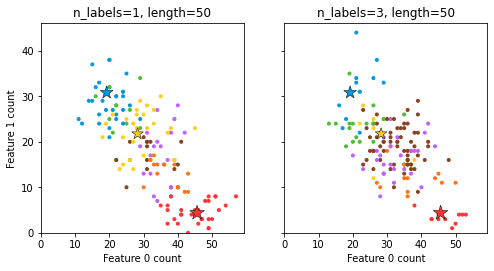

The data was generated from (random_state=164):
Class	P(C)	P(w0|C)	P(w1|C)
red	0.38	0.91	0.09
blue	0.33	0.38	0.62
yellow	0.30	0.56	0.44


In [87]:
# The original example from "https://scikit-learn.org/stable/auto_examples/datasets/plot_random_multilabel_dataset.html"
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification as make_ml_clf

COLORS = np.array(
    [
        "!",
        "#FF3333",  # red
        "#0198E1",  # blue
        "#BF5FFF",  # purple
        "#FCD116",  # yellow
        "#FF7216",  # orange
        "#4DBD33",  # green
        "#87421F",  # brown
    ]
)

# Use same random seed for multiple calls to make_multilabel_classification to
# ensure same distributions
RANDOM_SEED = np.random.randint(2 ** 10)


def plot_2d(ax, n_labels=1, n_classes=3, length=50):
    X, Y, p_c, p_w_c = make_ml_clf(
        n_samples=150,
        n_features=2,
        n_classes=n_classes,
        n_labels=n_labels,
        length=length,
        allow_unlabeled=False,
        return_distributions=True,
        random_state=RANDOM_SEED,
    )

    ax.scatter(
        X[:, 0], X[:, 1], color=COLORS.take((Y * [1, 2, 4]).sum(axis=1)), marker="."
    )
    ax.scatter(
        p_w_c[0] * length,
        p_w_c[1] * length,
        marker="*",
        linewidth=0.5,
        edgecolor="black",
        s=20 + 1500 * p_c ** 2,
        color=COLORS.take([1, 2, 4]),
    )
    ax.set_xlabel("Feature 0 count")
    return p_c, p_w_c


_, (ax1, ax2) = plt.subplots(1, 2, sharex="row", sharey="row", figsize=(8, 4))
plt.subplots_adjust(bottom=0.15)

p_c, p_w_c = plot_2d(ax1, n_labels=1)
ax1.set_title("n_labels=1, length=50")
ax1.set_ylabel("Feature 1 count")

plot_2d(ax2, n_labels=3)
ax2.set_title("n_labels=3, length=50")
ax2.set_xlim(left=0, auto=True)
ax2.set_ylim(bottom=0, auto=True)

plt.show()

print("The data was generated from (random_state=%d):" % RANDOM_SEED)
print("Class", "P(C)", "P(w0|C)", "P(w1|C)", sep="\t")
for k, p, p_w in zip(["red", "blue", "yellow"], p_c, p_w_c.T):
    print("%s\t%0.2f\t%0.2f\t%0.2f" % (k, p, p_w[0], p_w[1]))

# 3.8 make_biclusters

Generate an array with constant block diagonal structure for biclustering.

make_biclusters用于生成具有恒定块对角线结构(constant block diagonal structure)的数组以进行双向聚类。所谓“双向聚类”，是指对变量和实例同时聚类。本数据集可以用于谱协聚类(SpectralCoclustering)算法的示例。

ref1: https://scikit-learn.org.cn/view/11.html

ref2: https://blog.csdn.net/wong2016/article/details/83615321


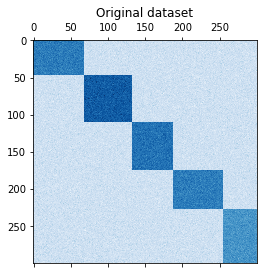

In [100]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_biclusters
data, rows, columns = make_biclusters(
    shape=(300, 300), n_clusters=5, noise=5,
    shuffle=False, random_state=0)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")
plt.show()


# 3.9 make_checkerboard

Generate an array with block checkerboard structure for biclustering.

make_checkerboard()用于生成一个具有棋盘格结构的数组，以进行双向聚类。

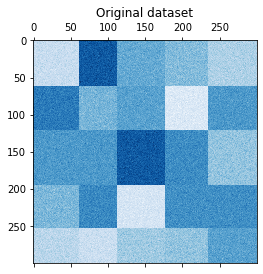

In [101]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_checkerboard
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=5, noise=5,
    shuffle=False, random_state=0)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")
plt.show()

# 6 回归任务数据集生成
    make_regression()
    make_sparse_uncorrelated()
    make_friedman1()
    make_friedman2()
    make_friedman3()
    
Regression Test Problems

Regression is the problem of predicting a quantity given an observation.

The make_regression() function will create a dataset with a linear relationship between inputs and the outputs.

You can configure the number of samples, number of input features, level of noise, and much more.

This dataset is suitable for algorithms that can learn a linear regression function.

The example below will generate 100 examples with one input feature and one output feature with modest noise.

Running the example will generate the data and plot the X and y relationship, which, given that it is linear, is quite boring.

## make_regression
make_regression()产生的回归目标作为一个可选择的稀疏线性组合的具有噪声的随机的特征。它的信息特征可能是不相关的或低秩（少数特征占大多数的方差），也即用于回归任务测试的样本生成器。

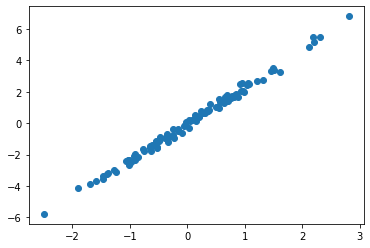

In [138]:
from sklearn.datasets import make_regression
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.2)
# plot regression dataset
plt.scatter(X,y)

# 7 流行学习任务数据集生成
    make_s_curve()
    make_swiss_roll()

# 8 降维任务数据集生成
    make_low_rank_matrix()
    make_sparse_coded_signal()
    make_spd_matrix()
    make_sparse_spd_matrix()

# 9. 开源数据集

有很多来自真实世界的开源数据集，虽然（由于比如说数据集大小或者版权等原因）没有直接集成到scikit-learn中，但是scikit-learn也提供了相应的获取（从各数据集的网络链接上下载）的API接口。这些API函数的统一以fetch_开头。

以下给出一些数据下载的示例代码，但是不对各用到的函数的参数进行具体描述，需要使用时可以自行查阅scikit-learn文档。


## 9.1 常用开源数据集

详细参见： https://scikit-learn.org/stable/datasets/real_world.html

In [124]:
dataset = pd.DataFrame()

dataset['数据集名称'] = ['Olivetti脸部图像数据集','kddcup99数据集','20类新闻分类数据集(文本)','20类新闻分类数据集(特征向量)','带标签的人脸数据集1','带标签的人脸数据集2','路透社新闻语料数据集','加州住房数据集','森林植被覆盖数据集','物种分布数据集']
dataset['模型类型'] = ['降维','分类','分类','分类','分类','分类','多分类','回归','多分类','分类']
dataset['数据大小(样本数*特征数)'] = ['400*64*64','???','18846*1','18846*130107','13233*5828','???','804414*47236','20460*8','581012*54','???']
dataset['API接口'] = ['fetch_olivetti_faces','fetch_kddcup99','fetch_20newsgroups','fetch_20newsgroups_vectorized','fetch_lfw_people','fetch_lfw_pairs','fetch_rcv1','fetch_california_housing','fetch_covtype','fetch_species_distributions']
dataset

,数据集名称,模型类型,数据大小(样本数*特征数),API接口
0,Olivetti脸部图像数据集,降维,400*64*64,fetch_olivetti_faces
1,kddcup99数据集,分类,???,fetch_kddcup99
2,20类新闻分类数据集(文本),分类,18846*1,fetch_20newsgroups
3,20类新闻分类数据集(特征向量),分类,18846*130107,fetch_20newsgroups_vectorized
4,带标签的人脸数据集1,分类,13233*5828,fetch_lfw_people
5,带标签的人脸数据集2,分类,???,fetch_lfw_pairs
6,路透社新闻语料数据集,多分类,804414*47236,fetch_rcv1
7,加州住房数据集,回归,20460*8,fetch_california_housing
8,森林植被覆盖数据集,多分类,581012*54,fetch_covtype
9,物种分布数据集,分类,???,fetch_species_distributions


## 9.2 函数接口

(1) fetch_olivetti_faces(data_home=None, shuffle=False, random_state=0, download_if_missing=True, return_X_y=False)

(2) fetch_20newsgroups(*, data_home=None, subset='train', categories=None, shuffle=True, random_state=42, remove=(), download_if_missing=True, return_X_y=False)']

(3) fetch_20newsgroups_vectorized(*, subset='train', remove=(), data_home=None, download_if_missing=True, return_X_y=False, normalize=True, as_frame=False)

(4) fetch_lfw_people(*, data_home=None, funneled=True, resize=0.5, min_faces_per_person=0, color=False, slice_=(slice(70, 195, None), slice(78, 172, None)), download_if_missing=True, return_X_y=False)

(5) fetch_lfw_pairs(*, subset='train', data_home=None, funneled=True, resize=0.5, color=False, slice_=(slice(70, 195, None), slice(78, 172, None)), download_if_missing=True)

(6) sklearn.datasets.fetch_covtype(*, data_home=None, download_if_missing=True, random_state=None, shuffle=False, return_X_y=False, as_frame=False)

(7) fetch_rcv1(*, data_home=None, subset='all', download_if_missing=True, random_state=None, shuffle=False, return_X_y=False)

(8) fetch_kddcup99(*, subset=None, data_home=None, shuffle=False, random_state=None, percent10=True, download_if_missing=True, return_X_y=False, as_frame=False)

(9) fetch_california_housing(*, data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)

一些公共的参数的说明：

data_home(str): 指定下载后数据存放目录路径。如果没有指定的话，缺省地存放地可以通过调用get_data_home()函数获取。通常Windows下是'C:/Users/Username/scikit_learn_data',而Linux系统下就是'~/scikit_learn_data'.

download_if_missing(bool): fetch_xyz()函数被调用时，首先会去缺省的数据存放目录搜索，找到了就直接用。没有找到的话，如果本参数设置为True就下载，False的话就报告错误。

return_X_y(bool), 返回Bunch Object，还是返回(data.data, data.target).

as_frame(bool), 返回的数据是不是变换为pandas DataFrame格式

shuffle(bool), 是否将数据进行shuffling（顺序打乱）处理。shuffling处理在数据使用时做也可以

random_state(bool), 是否设置随机种子，缺省为None表示每次调用会得到不同的结果，如果希望得到相同的结果就设置为某个固定的整数即可。在shuffling处理，或者其它涉及到随机选择的处理中需要随机种子.

还有一些各数据集fetch函数特定的选项，这里不一一说明。用到时可以查找"https://scikit-learn.org/stable/datasets/real_world.html".

在以下示例中也会对碰到的做一些简要说明。



### 例1 kddcup99数据集

以下命令下载kddcup99数据集的SA子集，并且只下载其中的10%。返回的数据分为数据样本X和标签y，并且都是以Pandas DataFrame格式返回。

In [161]:
from sklearn.datasets import fetch_kddcup99
X,y = fetch_kddcup99(subset='SA',percent10=True,return_X_y=True,as_frame=True)

(100655, 41) (100655,)
<class 'pandas.core.frame.DataFrame'> <class 'tuple'>
13


In [162]:
print(X.shape, y.shape)
print(type(X), type(y.shape))
print('There are {} classes in this dataset'.format(len(set(y))))
X

(100655, 41) (100655,)
<class 'pandas.core.frame.DataFrame'> <class 'tuple'>
There are 13 classes in this dataset


In [160]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100650,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,255,4,0.02,0.06,0.0,0.0,1.0,1.0,0.0,0.0
100651,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,255,7,0.03,0.07,0.0,0.0,1.0,1.0,0.0,0.0
100652,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
100653,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### 例2 20类新闻分类数据集

“fetch_20newsgroups_vectorized”与“fetch_20newsgroups”的区别在于前者在后者的基础上进一步进行向量化的处理，所以前者的数据维度要远远大得多。


In [183]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

from pprint import pprint
pprint(list(newsgroups_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [185]:
print(newsgroups_train.filenames.shape)
print(newsgroups_train.filenames[:5])
print(type(newsgroups_train.data),len(newsgroups_train.data))
print(newsgroups_train.data[0])
print(newsgroups_train.target.shape)
print(newsgroups_train.target[:10])

(11314,)
['C:\\Users\\chenxy\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.autos\\102994'
 'C:\\Users\\chenxy\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51861'
 'C:\\Users\\chenxy\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51879'
 'C:\\Users\\chenxy\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38242'
 'C:\\Users\\chenxy\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\60880']
<class 'list'> 11314
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If a

20newsgroups数据集有20个分类，可以在下载时选择只取其中一部分分类的样本，这个通过设置fetch_20newsgroups的'categories'参数来控制。

In [180]:
cats = ['alt.atheism', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats)

print(list(newsgroups_train.target_names))
print(len(newsgroups_train.data))
print(newsgroups_train.target.shape)

['alt.atheism', 'sci.space']
1073
(1073,)


为了方便统计分析，以文本方式出现的数据样本首先必须转换成数值向量的表示形式，这个可以通过sklearn.feature_extraction.text中工具来实现，以下例子从20newsgroups数据集的子集中提取出一元分词令牌的TF-IDF向量(TF-IDF vectors of unigram tokens)。

所提取的TF-IDF向量是非常稀疏的， vectors are very sparse, with an average of 159 non-zero components by sample in a more than 30000-dimensional space (less than .5% non-zero features):

In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer
categories = ['alt.atheism', 'talk.religion.misc','comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',categories=categories)
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
print(vectors.shape)

print(vectors.nnz / float(vectors.shape[0]))

(2034, 34118)
159.0132743362832


In [181]:
from sklearn.datasets import fetch_20newsgroups_vectorized
newsgroups_train = fetch_20newsgroups_vectorized(subset='train')
print(newsgroups_train.data.shape)
print(newsgroups_train.data.nnz)

(11314, 130107)
1787565


与前面第一次调用newsgroups_train = fetch_20newsgroups(subset='train')的结果做对比，可以看出fetch_20newsgroups返回的数据newsgroups_train.data是一个列表，列表中每一项就是一个很长的字符串，表示一个语料样本。而fetch_20newsgroups_vectorized返回的是一个矩阵，其中每一行对应一个语料样本，只不过被变换成一个130107维的向量罢了。

### 例3 带标签的人脸数据集

要注意带标签的人脸数据集1(fetch_lfw_people())与带标签的人脸数据集2(fetch_lfw_pairs())的区别。

前者是用于人脸识别( Face Recognition or Face Identification)任务的，给定一张照片，识别出TA是谁（对应于已经学习好的数据库中的哪个人，比如说匹配出其名字）；后者是用于人脸验证（Face Verification）任务的，给定两张照片，确定它们是不是同一个人的照片之类的。

In [199]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4) # 对每个人至少取70张图片

for name in lfw_people.target_names:
    print(name)

Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Tony Blair


与手写数字数据集一样，这个数据集由于是关于人脸的，所以既有一维向量表示的数据样本(lfw_people.data)，也有二维图像表示的数据样本，可以用imshow()来显式对应的样本图片。

(1288, 1850)
(1288, 50, 37)


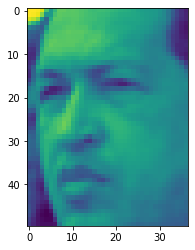

In [198]:
print(lfw_people.data.shape)
print(lfw_people.images.shape)
imshow(lfw_people.images[0])

## 9.3 openml数据集仓库

openml.org是一个用于机器学习的数据和实验的仓库，它允许任何人上传开放数据集。scikit-learn提供了datasets.fetch_openml()接口函数用于从openml.org下载指定的数据集。每个数据集在openml.org有唯一的名字和ID编号，以及不同的版本编号。用datasets.fetch_openml()下载时需要指定数据集的名字或者ID编号)(but not both)，并指定版本号。如下例所示：

In [107]:
from sklearn.datasets import fetch_openml
mice = fetch_openml(name='miceprotein', version=4)
print(mice.data.shape)
print(mice.target.shape)
print(np.unique(mice.target))

(1080, 77)
(1080,)
['c-CS-m' 'c-CS-s' 'c-SC-m' 'c-SC-s' 't-CS-m' 't-CS-s' 't-SC-m' 't-SC-s']


如前所述，通过fetch_()函数下载的数据的缺省存放目录可以通过调用get_data_home()函数来获得。所以我们可以在以下目录中看到下载下来的20news-bydate_py3.pkz数据，以及其它已经下载下来的数据。

In [200]:
import os
print(get_data_home())
print(os.listdir(get_data_home()))

C:\Users\chenxy\scikit_learn_data
['20news-bydate_py3.pkz', '20newsgroup_vectorized_py3.pkl', 'kddcup99_10-py3', 'lfw_home', 'openml']


## 9.4 其它开放数据

除了以上所提到的各种数据集或仓库外，还有很多其它的著名的开放数据集或仓库，比如说综合类的UCI数据集、Kaggle竞赛数据集；计算机视觉领域著名的ImageNet、情感分析用的IMDB、Sentiment140；公共政府数据集、金融与经济数据集、语音数据集、自动驾驶类数据集自然语言处理数据集等等等等，这里就不一一介绍了。


# 10. 小结

### Extensions
This section lists some ideas for extending the tutorial that you may wish to explore.

Compare Algorithms. Select a test problem and compare a suite of algorithms on the problem and report the performance.
Scale Up Problem. Select a test problem and explore scaling it up, use progression methods to visualize the results, and perhaps explore model skill vs problem scale for a given algorithm.
Additional Problems. The library provides a suite of additional test problems; write a code example for each to demonstrate how they work.
If you explore any of these extensions, I’d love to know.

### Further Reading
This section provides more resources on the topic if you are looking to go deeper.

scikit-learn User Guide: Dataset loading utilities
scikit-learn API: sklearn.datasets: Datasets

## Summary
In this tutorial, you discovered test problems and how to use them in Python with scikit-learn.

Specifically, you learned:

How to generate multi-class classification prediction test problems.
How to generate binary classification prediction test problems.
How to generate linear regression prediction test problems.

Ref: https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/

Test datasets are small contrived datasets that let you test a machine learning algorithm or test harness.

The data from test datasets have well-defined properties, such as linearly or non-linearity, that allow you to explore specific algorithm behavior. The scikit-learn Python library provides a suite of functions for generating samples from configurable test problems for regression and classification.

In this tutorial, you will discover test problems and how to use them in Python with scikit-learn.

After completing this tutorial, you will know:

How to generate multi-class classification prediction test problems.
How to generate binary classification prediction test problems.
How to generate linear regression prediction test problems.


## Tutorial Overview
This tutorial is divided into 3 parts; they are:

. Test Datasets 

. Classification Test Problems 

. Regression Test Problems

## Test Datasets
A problem when developing and implementing machine learning algorithms is how do you know whether you have implemented them correctly. They seem to work even with bugs.

Test datasets are small contrived problems that allow you to test and debug your algorithms and test harness. They are also useful for better understanding the behavior of algorithms in response to changes in hyperparameters.

Below are some desirable properties of test datasets:

(1) They can be generated quickly and easily.

(2) They contain “known” or “understood” outcomes for comparison with predictions.

(3) They are stochastic, allowing random variations on the same problem each time they are generated.

(4) They are small and easily visualized in two dimensions.

(5) They can be scaled up trivially.

I recommend using test datasets when getting started with a new machine learning algorithm or when developing a new test harness.

scikit-learn is a Python library for machine learning that provides functions for generating a suite of test problems.

In this tutorial, we will look at some examples of generating test problems for classification and regression algorithms.